In [3]:
%matplotlib inline
from matplotlib import style
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect = True)

In [8]:

# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
latest_date= session.query(measurement.date).order_by(measurement.date.desc()).first()
latest_date

('2017-08-23',)

Text(0.5, 0, 'Date')

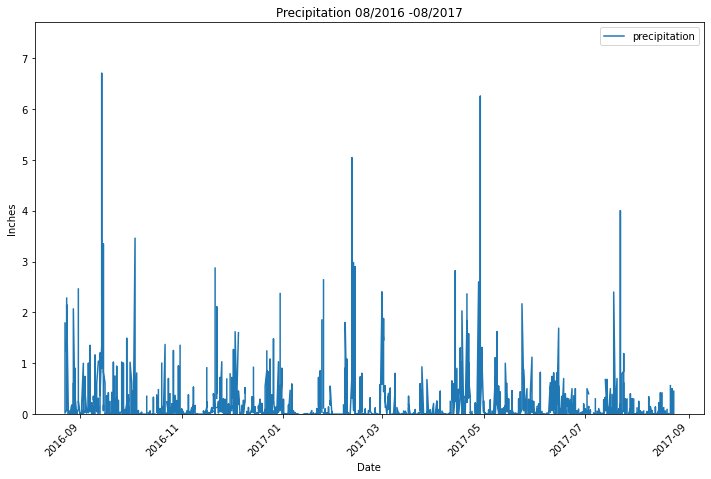

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
latest_date = dt.date(2017,8, 23)

# Calculate the date one year from the last date in data set.
year_ago =  latest_date - dt.timedelta(days = 365)

# Perform a query to retrieve the data and precipitation scores
query = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

# Save the query results as a Pandas DataFrame 
measure_df = pd.DataFrame(query).rename(columns = {'prcp': 'precipitation'})

# Cast the dates  datetime 

measure_df['date']= pd.to_datetime(measure_df['date'], format = '%Y-%m-%d')
   

#set the index to the date column

measure_df = measure_df.set_index('date')

# Sort the dataframe by date
mesure_df = measure_df.sort_values(by = ["date"])

# Use Pandas Plotting with Matplotlib to plot the data

measure_df.plot(title = 'Precipitation 08/2016 -08/2017' , figsize = (12,8), rot = 45)
plt.legend(loc = 'upper right')
plt.ylim(0,7.7)
plt.ylabel('Inches')
plt.xlabel('Date')


In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset


In [15]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [18]:
# Close Session
session.close()